In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle_zillow
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [2]:
zillow = pd.read_csv('zillow.csv')

In [3]:
zillow = zillow.drop('Unnamed: 0', axis =1 )

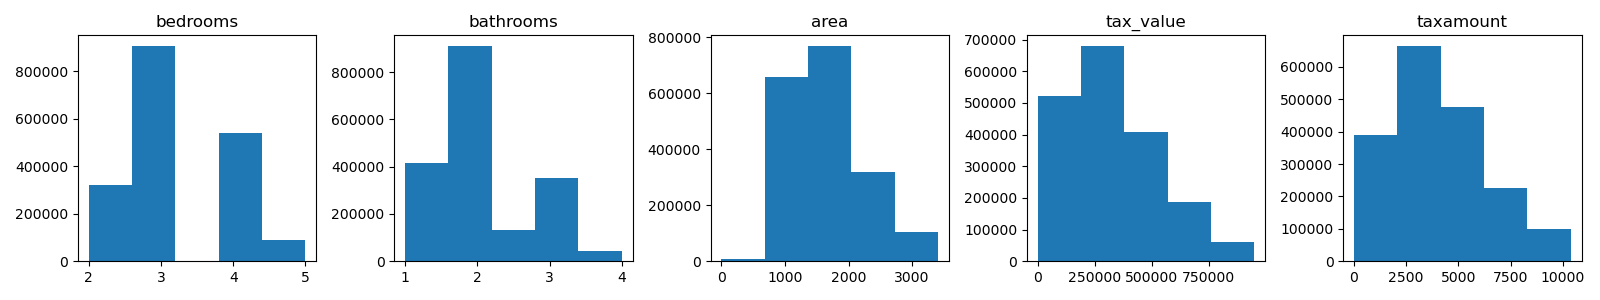

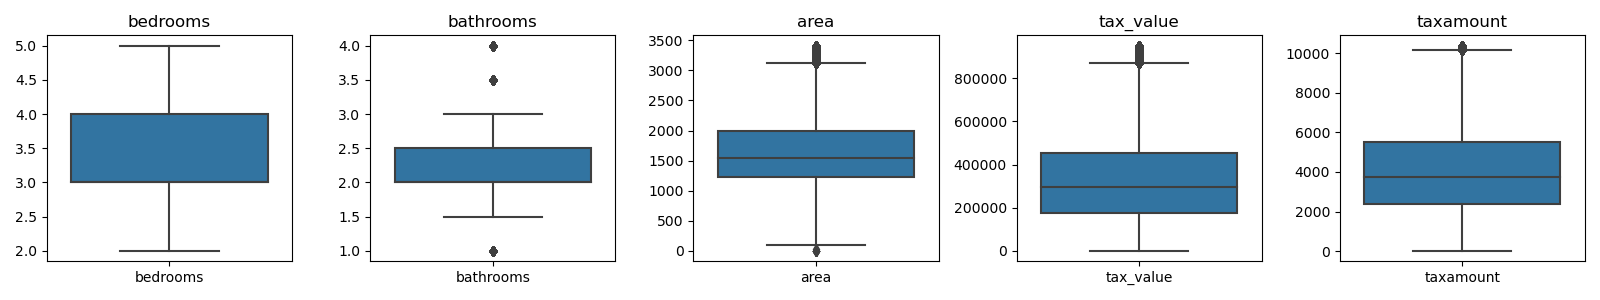

In [4]:
train, validate, test = wrangle_zillow.prepare_zillow(zillow)

In [5]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [6]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [7]:
train.dtypes

bedrooms      float64
bathrooms     float64
area          float64
tax_value     float64
year_built    float64
taxamount     float64
fips           object
dtype: object

In [8]:
trainsamp1 = train.sample(1000)

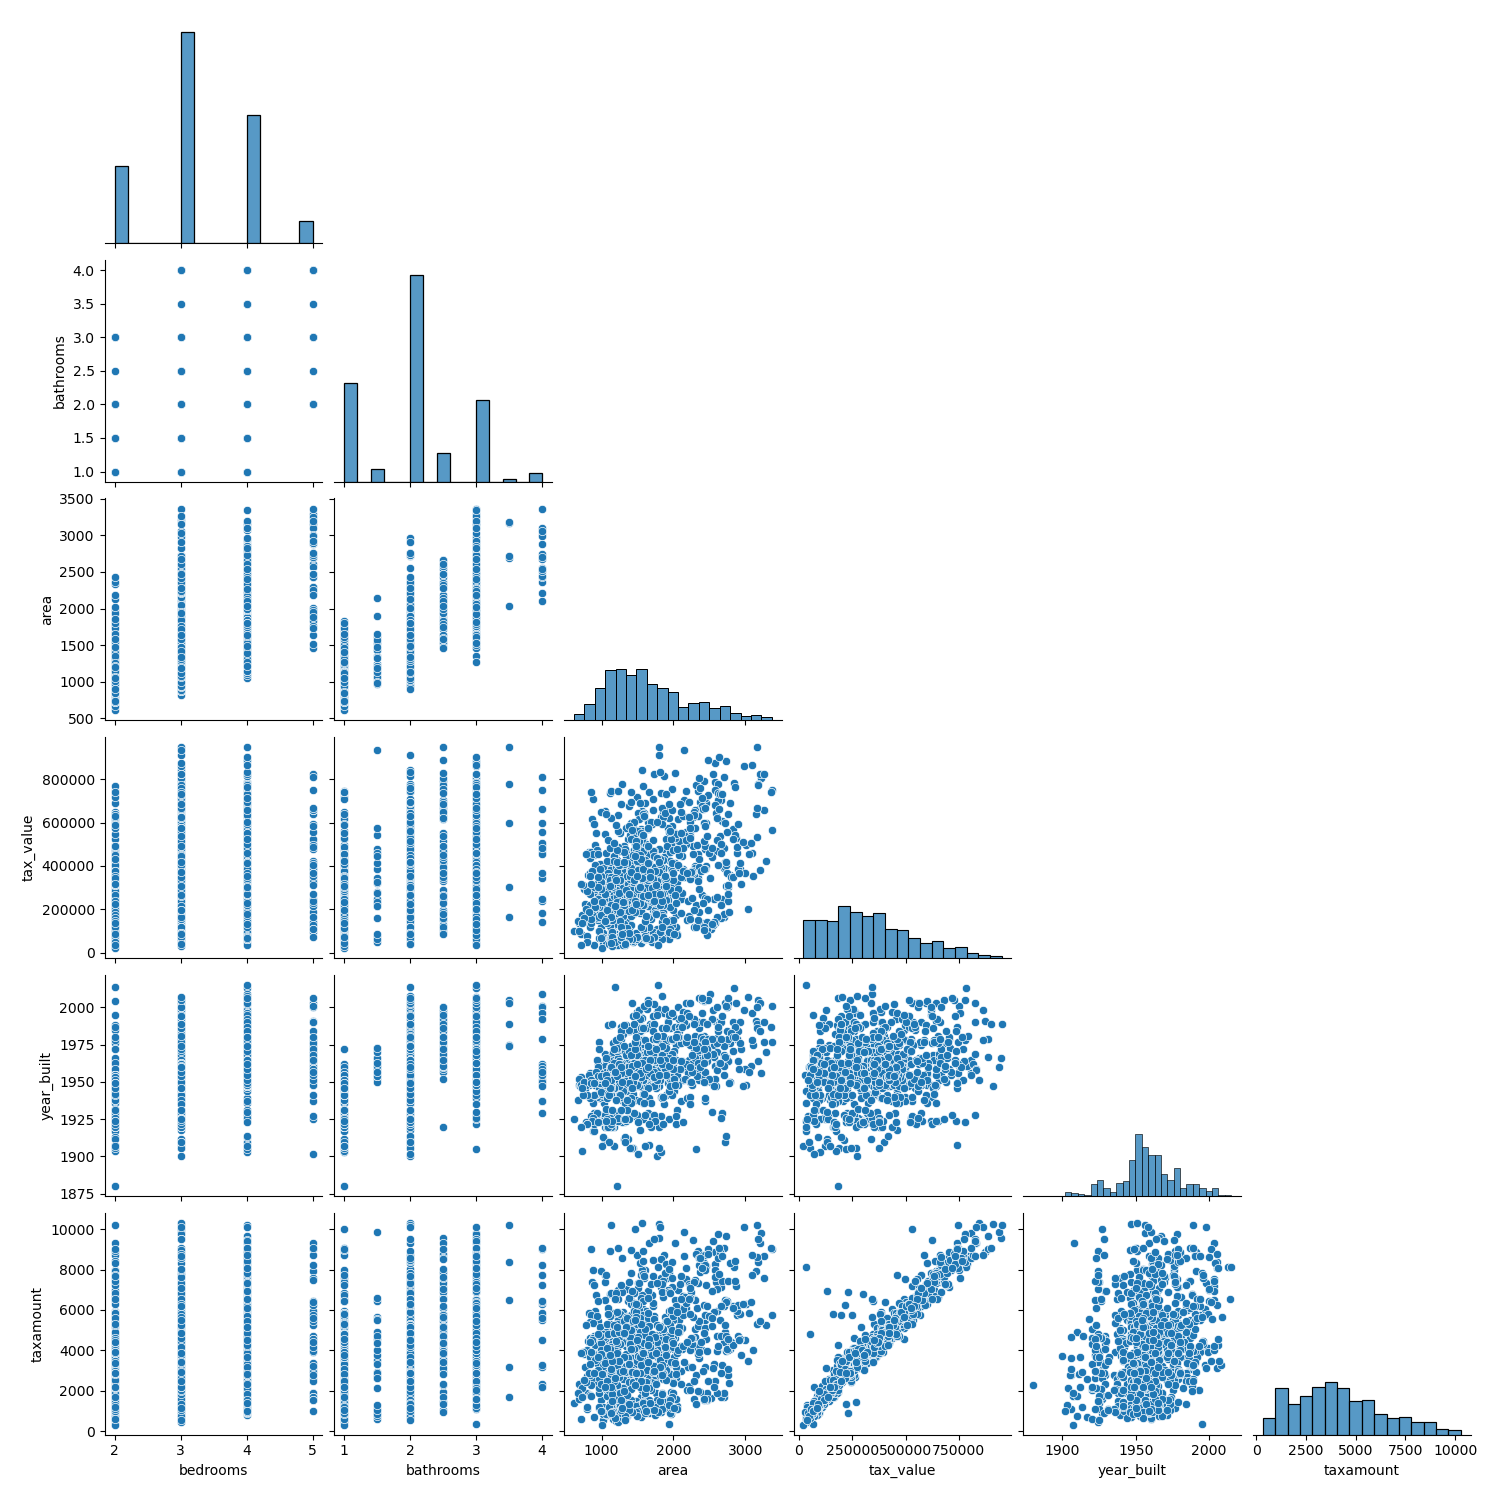

In [9]:
sns.pairplot(train.sample(1000).drop(columns=['fips']), corner=True)
plt.show()


In [10]:
trainsamp1.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1146219,2.0,1.0,962.0,336000.0,1927.0,4401.33,6037.0
159933,4.0,3.0,2203.0,540351.0,1986.0,6587.46,6059.0
212327,4.0,3.0,2701.0,830454.0,1995.0,9382.46,6059.0
1192647,3.0,1.0,1234.0,220984.0,1949.0,2880.42,6059.0
1406706,2.0,1.0,936.0,224481.0,1915.0,2808.85,6037.0


In [12]:
trainsamp1['age'] = 2023-trainsamp1['year_built']

In [13]:
trainsamp1.head(1)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
314189,3.0,3.0,1642.0,196338.0,1961.0,2496.77,6037.0,62.0


In [17]:
def visualize_corr(df, sig_level=0.05, figsize=(10,8)):
    """
    Takes a Pandas dataframe and a significance level, and creates a heatmap of 
    statistically significant correlations between the variables.
    """
    # Create correlation matrix
    corr = df.corr()

    # Mask upper triangle of matrix (redundant information)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Get statistically significant correlations (p-value < sig_level)
    pvals = df.apply(lambda x: df.apply(lambda y: stats.pearsonr(x, y)[1]))
    sig = (pvals < sig_level).values
    corr_sig = corr.mask(~sig)

    # Set up plot
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.2)
    sns.set_style("white")

    # Create heatmap with statistically significant correlations
    sns.heatmap(corr_sig, cmap='Purples', annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f"Statistically Significant Correlations (p<{sig_level})")
    plt.show()

In [22]:
train.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [23]:
train.dtypes

bedrooms      float64
bathrooms     float64
area          float64
tax_value     float64
year_built    float64
taxamount     float64
fips           object
dtype: object

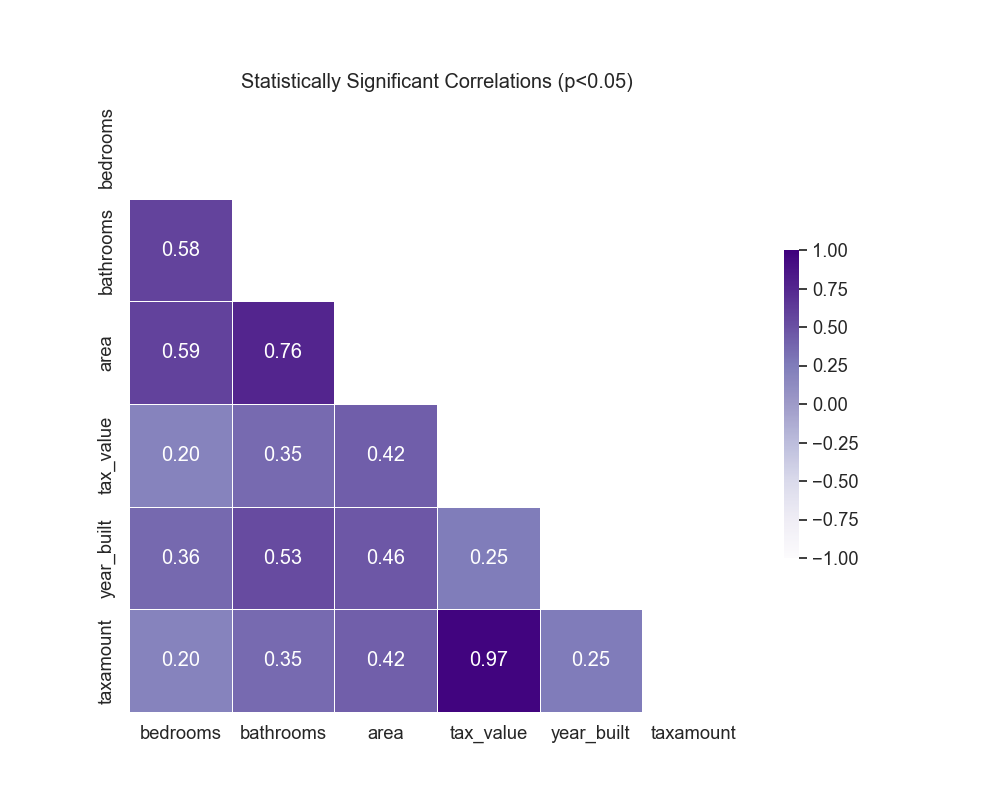

In [25]:
visualize_corr(train.drop(columns='fips'))